Analysis of 3 replica of metadynamics simulations for unbinding using specific contacts between protein and DNA, the hinge helices and the helicity of the hinge region as a CV. The analysis obtains the distancs, hinge helicity, cmap values of specific residues and number if protein DNA hydrogen bonds ans well as protein-protein hydrogen bonds from gromacs analysis. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
import mdtraj as md
import nglview as ngl
import sys
sys.path.append("/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/")
from analysis_scripts import plotting_gmx
from analysis_scripts import analysis_of_CVs
from analysis_scripts import analysis_of_CVs_NMR

In [2]:
#plt.style.use("dark_background")
#sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 1})

In [3]:
folder = "/home/x_mallu/mln_lf/EXP-22-BV4083/data_OSymL/DNA-protein_protein-protein_alphaRMSD/06-prod/"
topo = folder + "1/1efa_noTet_99sbws_proc_mod_resID.pdb"
folder_unbiases = "/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/06-unbiased_SymL/"
folder_NMR_OSymL = "/home/x_mallu/mln_lf/EXP-23-BV4094/data_SymL/06-prod/"

In [4]:
def read_colvar(path, skiprows = [0,1,2]):
    """ Reads the colvar file and adds a row with the MD time in ps.
    
    """

    colvar = pd.read_csv(path + "COLVAR", sep='\s+', skiprows=1,\
        names=['time (ps)','alpha','cmap','metaD.bias', 'metaD.work',\
               'metaD.acc'])

    colvar["MD time (ps)"] = colvar['time (ps)']*colvar['metaD.acc'].astype(float) 
    colvar['metaD.acc']  = colvar['metaD.acc'].astype(float)
    return(colvar)

In [5]:
colvar = read_colvar(folder+'1/')
colvar['replica'] = [1 for x in range(len(colvar))]
for i in [2,3]:
    colvar_n = read_colvar(folder+'{}/'.format(i))
    colvar_n['replica'] = [i for x in range(len(colvar_n))]
    colvar = colvar.append(colvar_n)

/home/x_mallu/.conda/envs/myownenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


In [10]:
colvar_100 = read_colvar(folder+'1/',skiprows=9999900)
colvar_100['replica'] = [1 for x in range(len(colvar_100))]

In [13]:
colvar_100 = read_colvar(folder+'1/',skiprows=9999900)
colvar_100['replica'] = [1 for x in range(len(colvar_100))]
for i in [2,3]:
    colvar_n_100 = read_colvar(folder+'{}/'.format(i),skiprows=9999900)
    colvar_n_100['replica'] = [i for x in range(len(colvar_n_100))]
    colvar_100 = colvar_100.append(colvar_n_100)

In [14]:
colvar_100

,time (ps),alpha,cmap,metaD.bias,metaD.work,metaD.acc,MD time (ps),replica
0,0.00,3.998588,20.990662,0.000000,0.000000,1.000000e+00,0.000000e+00,1
1,0.02,3.998187,20.986504,0.000000,0.000000,1.000000e+00,2.000000e-02,1
2,0.04,3.998097,20.982436,0.000000,0.000000,1.000000e+00,4.000000e-02,1
3,0.06,3.998356,20.983610,0.000000,0.000000,1.000000e+00,6.000000e-02,1
4,0.08,3.998840,20.989971,0.000000,0.000000,1.000000e+00,8.000000e-02,1
...,...,...,...,...,...,...,...,...
9999996,199999.92,3.302705,15.953185,164.195144,7275.072965,3.805831e+29,7.611659e+34,3
9999997,199999.94,3.330067,16.177487,166.964064,7275.072965,3.805831e+29,7.611659e+34,3
9999998,199999.96,3.351684,16.141943,165.766043,7275.072965,3.805830e+29,7.611659e+34,3
9999999,199999.98,3.393699,15.962860,165.145837,7275.072965,3.805830e+29,7.611659e+34,3


In [17]:
colvar_100.mean(), colvar_100.std()/3

(time (ps)       1.000000e+05
 alpha           2.282930e+00
 cmap            1.468933e+01
 metaD.bias      1.461961e+02
 metaD.work      8.463347e+03
 metaD.acc       3.994354e+29
 MD time (ps)    7.611241e+34
 replica         2.000000e+00
 dtype: float64,
 time (ps)       1.924501e+04
 alpha           4.125771e-01
 cmap            1.317543e+00
 metaD.bias      1.058883e+01
 metaD.work      9.620383e+02
 metaD.acc       7.747521e+29
 MD time (ps)    1.521562e+35
 replica         2.721655e-01
 dtype: float64)

In [6]:
#colvar.describe()

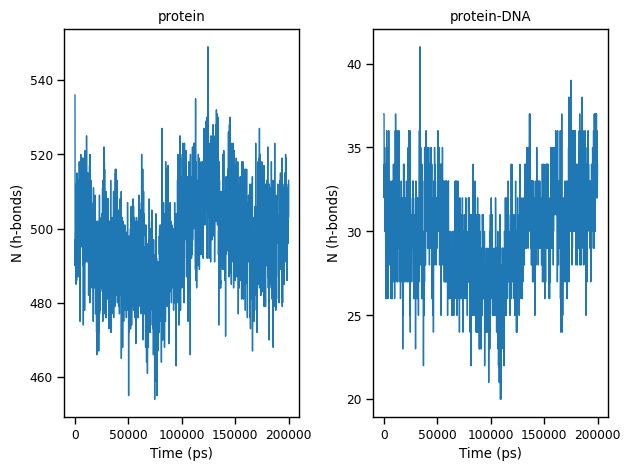

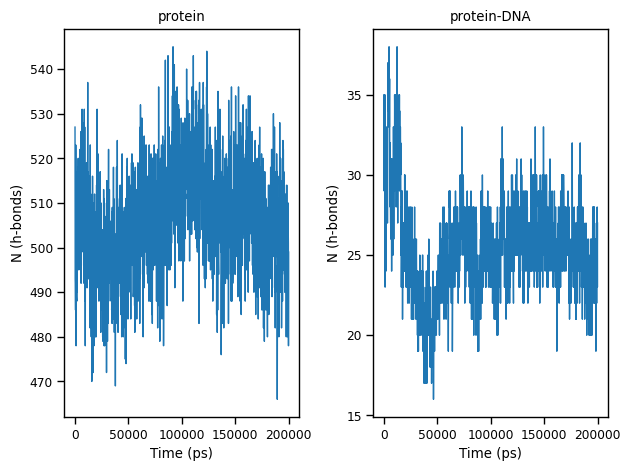

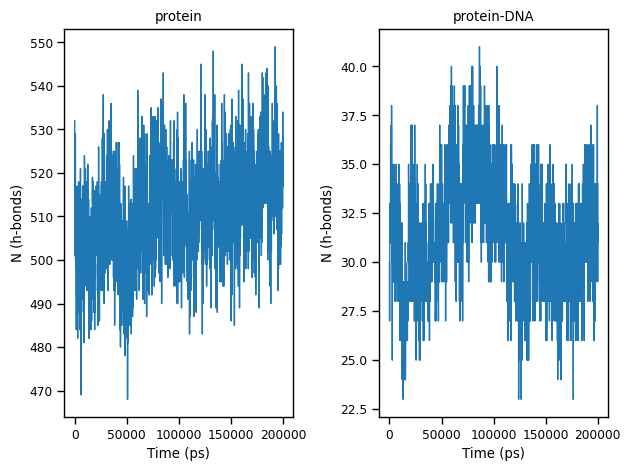

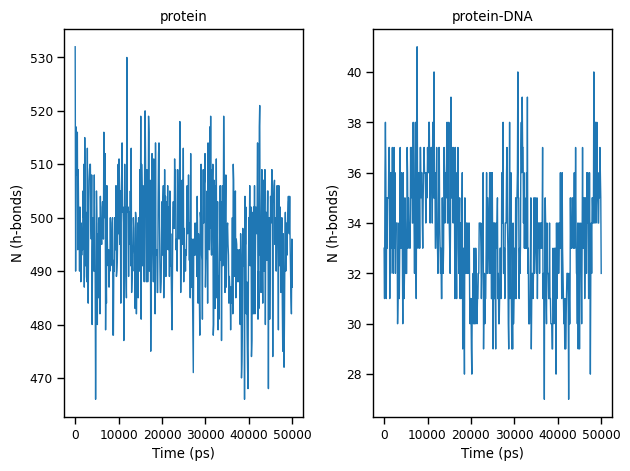

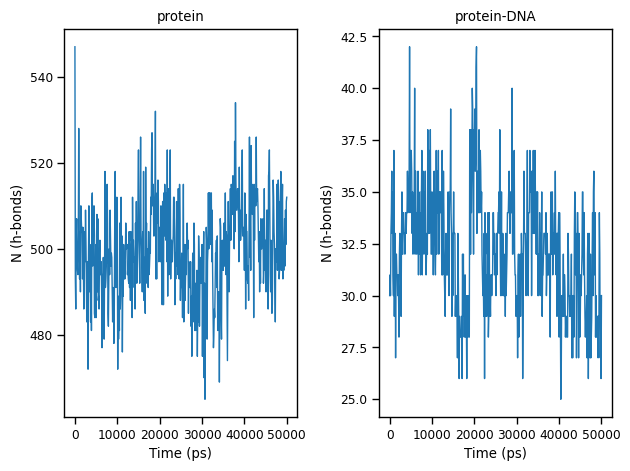

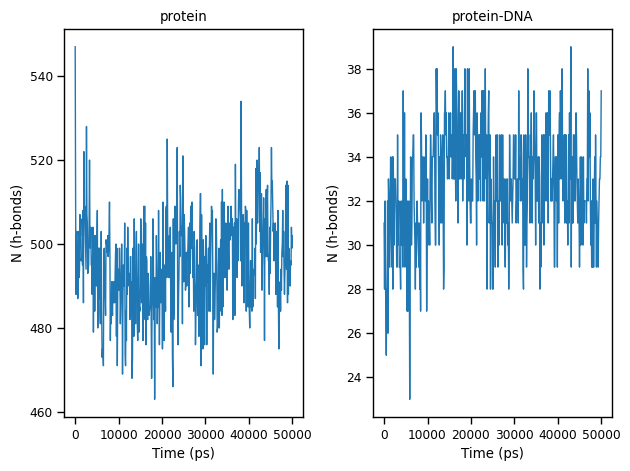

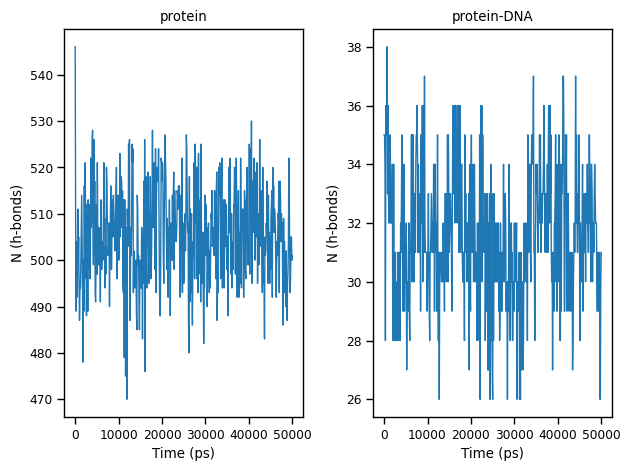

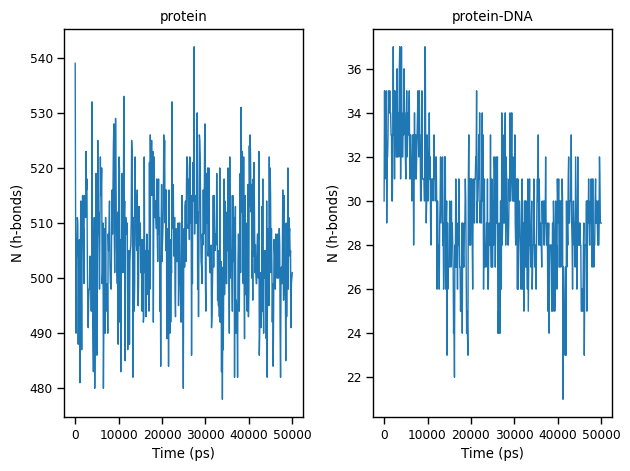

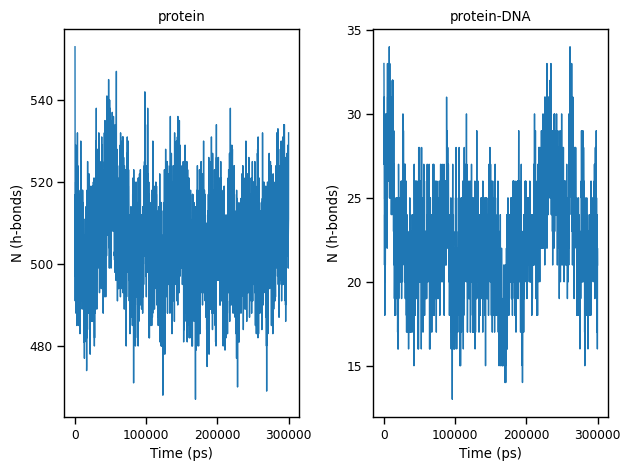

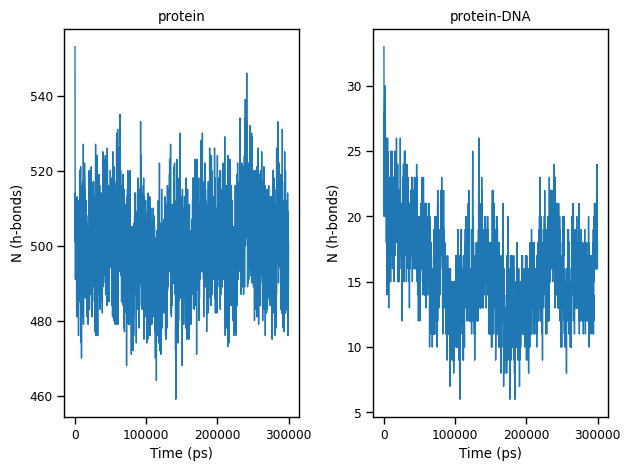

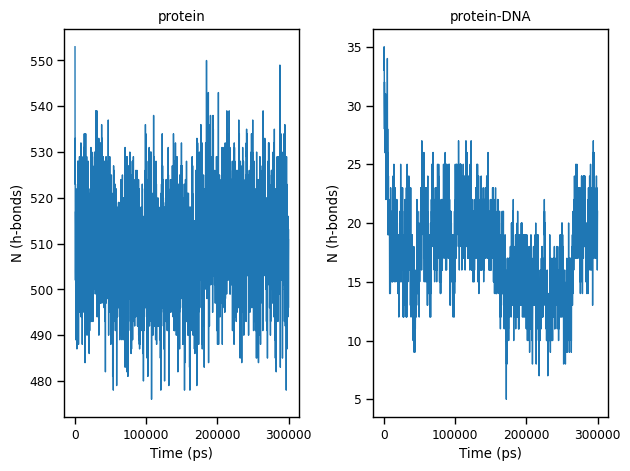

In [5]:
# read in all the data from PLUMED CV analysis for plotting
CVs = analysis_of_CVs.CVs_replicas(folder,3)
CVs["Simulation"]= ["MetaD, OSymL" for x in range(len(CVs))]
CVs_unbiased = analysis_of_CVs.CVs_replicas(folder_unbiases,5)
CVs_unbiased["Simulation"]= ["Unbiased, OSymL" for x in range(len(CVs_unbiased))]
NMR_CVs = analysis_of_CVs_NMR.CVs_replicas(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_CVs["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_CVs))]
CVs_all  = CVs.append([CVs_unbiased, NMR_CVs])

# read in the data from GROMACS h-bond analysis
hbonds_metaD = analysis_of_CVs_NMR.plot_hbonds(folder,3)
hbonds_metaD["Simulation"]= ["MetaD, OSymL" for x in range(len(hbonds_metaD))]
hbonds_ub = analysis_of_CVs_NMR.plot_hbonds(folder_unbiases,5)
hbonds_ub["Simulation"]= ["Unbiased, OSymL" for x in range(len(hbonds_ub))]
NMR_hbonds = analysis_of_CVs_NMR.plot_hbonds(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_hbonds["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_hbonds))]
hbonds_all = pd.concat([hbonds_metaD, hbonds_ub, NMR_hbonds])

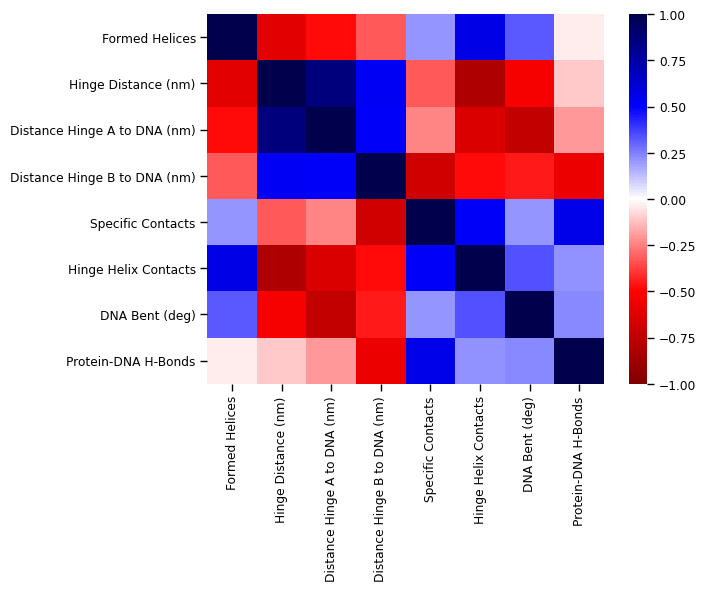

In [6]:
# Check the correlation between differen CVs + H-bonds 
CVs["Protein-DNA H-Bonds"]=hbonds_metaD["Protein-DNA H-Bonds"]
coor = CVs.drop(columns=["Time (ps)","Time (ns)","Replica","DNA bent (rad)","Contacts","Hinge DNA\nDistance (nm)"]).corr()
sns.heatmap(coor,cmap='seismic_r',vmin=-1, vmax=1)
plt.show()

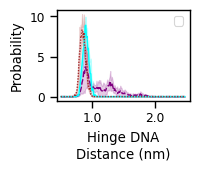

,Simulation,Probability,Hinge DNA\nDistance (nm)
0,"Unbiased, OSymL",0.0,0.50
1,"Unbiased, OSymL",0.0,0.51
2,"Unbiased, OSymL",0.0,0.52
3,"Unbiased, OSymL",0.0,0.53
4,"Unbiased, OSymL",0.0,0.54
...,...,...,...
2184,"NMR, OSymL",0.0,2.44
2185,"NMR, OSymL",0.0,2.45
2186,"NMR, OSymL",0.0,2.46
2187,"NMR, OSymL",0.0,2.47


In [9]:
analysis_of_CVs.Write_Probability_Data_Frame(CVs_all,"Hinge DNA\nDistance (nm)", np.arange(0.5,2.5,0.01), plot_t="line",\
                                            figure_path="/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/Figures/MetaD/OSymL_specific_protein_protein_alpha/")

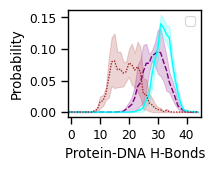

,Simulation,Probability,Protein-DNA H-Bonds
0,"Unbiased, OSymL",0.0,-1
1,"Unbiased, OSymL",0.0,0
2,"Unbiased, OSymL",0.0,1
3,"Unbiased, OSymL",0.0,2
4,"Unbiased, OSymL",0.0,3
...,...,...,...
501,"NMR, OSymL",0.0,40
502,"NMR, OSymL",0.0,41
503,"NMR, OSymL",0.0,42
504,"NMR, OSymL",0.0,43


In [7]:
analysis_of_CVs.Write_Probability_Data_Frame(hbonds_all, "Protein-DNA H-Bonds", np.arange(-1,46,1), plot_t="line",\
                                            figure_path="/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/Figures/MetaD/OSymL_specific_protein_protein_alpha/")

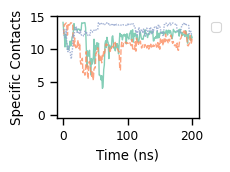

In [9]:
#plt.subplots(figsize=(4.5,1.8))
plt.subplots(figsize=(2.5,1.8))
#plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::10], y = "Specific Contacts", x = "Time (ns)", alpha = 0.8, hue = "Replica", style="Replica",\
            palette="Set2")

plt.ylim(-0.5,15)
#plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/alpha/plots_Dec22/Specific_Contacts.pdf", dpi=300)
plt.show()

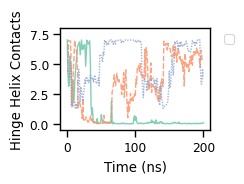

In [11]:
plt.subplots(figsize=(2.5,1.8))
#plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::10], y = "Hinge Helix Contacts", x = "Time (ns)", alpha = 0.8, hue = "Replica", style="Replica",\
            palette="Set2")

plt.ylim(-0.5,8)
#plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/alpha/plots_Dec22/Hinge_Contacts.pdf", dpi=300)
plt.show()

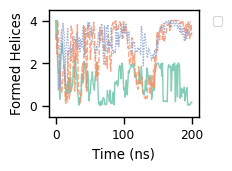

In [13]:
plt.subplots(figsize=(2.5,1.8))
#plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::10], y = "Formed Helices", x = "Time (ns)", alpha = 0.8, hue = "Replica", style="Replica",\
            palette="Set2")

plt.ylim(-0.5,4.5)
#plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/alpha/plots_Dec22/HingesFormed.pdf", dpi=300)
plt.show()

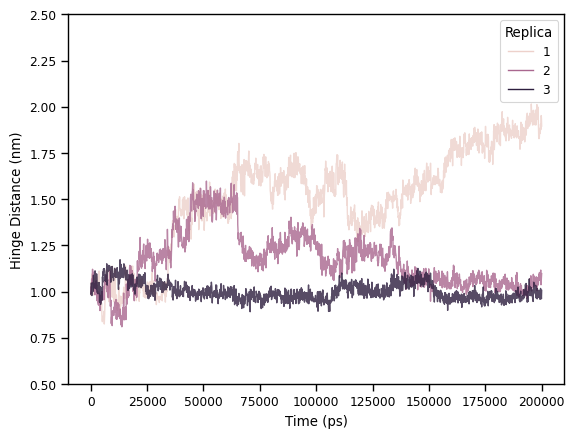

In [14]:
sns.lineplot(data = CVs[::1], y = "Hinge Distance (nm)", x = "Time (ps)", alpha = 0.8, hue = "Replica")
plt.ylim(0.5,2.5)
#plt.xlim(0,1000*10**12)
plt.show()

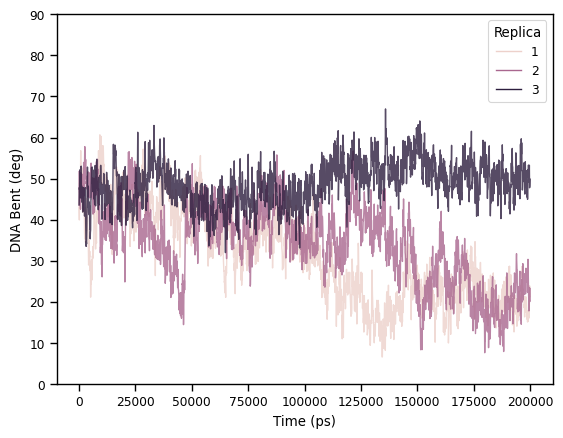

In [15]:
sns.lineplot(data = CVs[::1], y = "DNA Bent (deg)", x = "Time (ps)", alpha = 0.8, hue = "Replica")
plt.ylim(0,90)
#plt.xlim(0,1000*10**12)
plt.show()

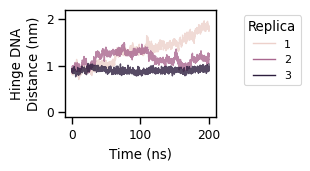

In [16]:
#plt.subplots(figsize=(2.5,1.8))
plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::1], y = "Hinge DNA\nDistance (nm)", x = "Time (ns)", alpha = 0.8, hue = "Replica")
plt.ylim(-0.1,2.2)
plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
#plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/alpha/plots_Dec22/Hinge_DNA_dist_lg.pdf", dpi=300)
plt.show()

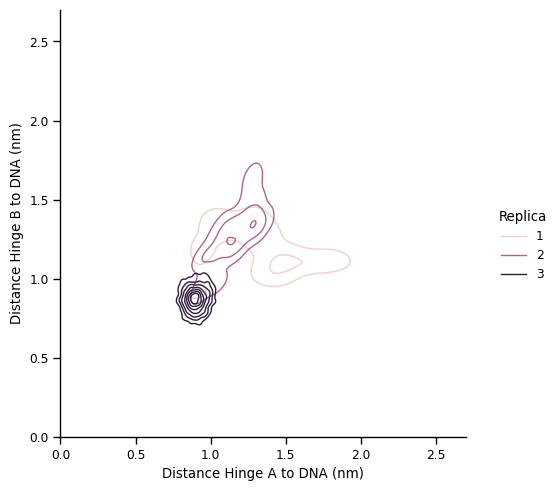

In [18]:
sns.displot(CVs[::], x="Distance Hinge A to DNA (nm)", y="Distance Hinge B to DNA (nm)", kind="kde", \
            thresh=.05, levels=8, hue = "Replica")
plt.ylim(0,2.7)
plt.xlim(0,2.7)
plt.show()

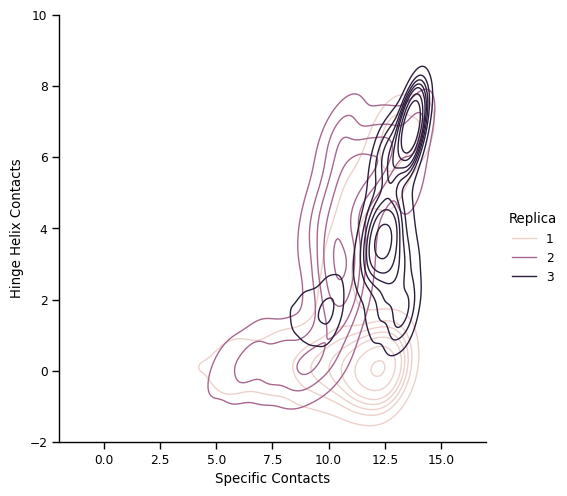

In [19]:
sns.displot(CVs[::], x='Specific Contacts', y='Hinge Helix Contacts', kind="kde", \
            thresh=.05, levels=8, hue = "Replica")
plt.ylim(-2,10)
plt.xlim(-2,17)
plt.show()

The RMSD has been analysed by aligning the protein core, the stable region of the complex. The DNA moves a lot with respect to this reference.

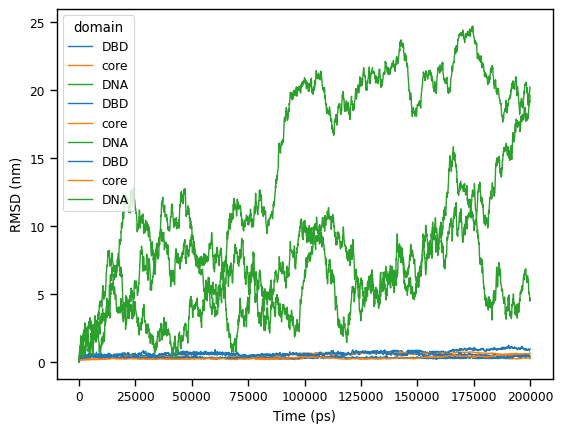

In [22]:
rmsd = plotting_gmx.plot_ana_rmsd(folder + "1/ana/" )
rmsd['replica'] = [1 for x in range(len(rmsd))]
for i in [2,3]:
    rmsd_n = plotting_gmx.plot_ana_rmsd(folder+'{}/ana/'.format(i))
    rmsd_n['replica'] = [i for x in range(len(rmsd_n))]
    rmsd = rmsd.append(rmsd_n)
plt.show()

In [23]:
rmsd_DBD = rmsd[rmsd["domain"]=="DBD"]
rmsd_DNA = rmsd[rmsd["domain"]=="DNA"]
rmsd_core = rmsd[rmsd["domain"]=="core"]

In [24]:
rmsd_DBD

,Time (ps),RMSD (nm),domain,replica
0,0.0,0.000502,DBD,1
1,100.0,0.197344,DBD,1
2,200.0,0.244981,DBD,1
3,300.0,0.301541,DBD,1
4,400.0,0.245927,DBD,1
...,...,...,...,...
1996,199600.0,0.436307,DBD,3
1997,199700.0,0.425183,DBD,3
1998,199800.0,0.395844,DBD,3
1999,199900.0,0.359877,DBD,3


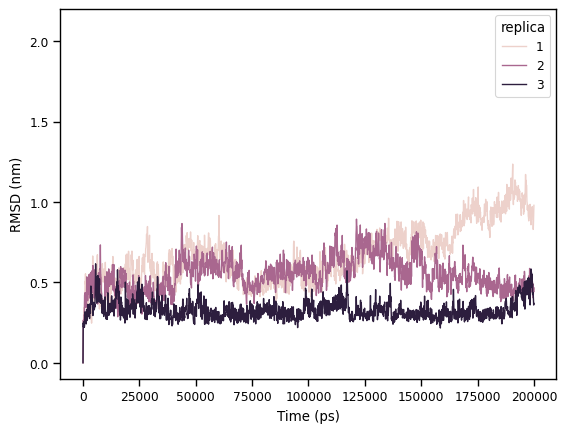

In [25]:
sns.lineplot(data = rmsd_DBD, x = "Time (ps)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-0.1,2.2)
plt.show()

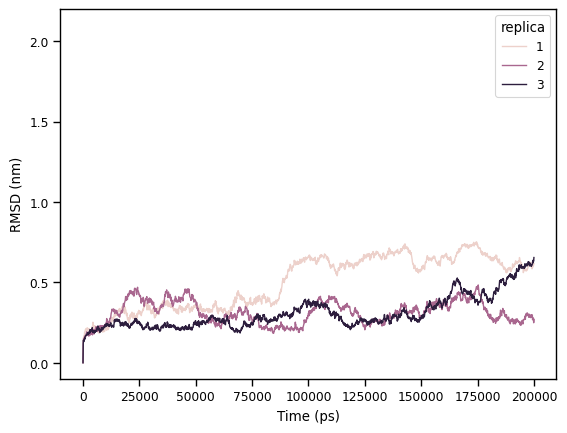

In [26]:
sns.lineplot(data = rmsd_core, x = "Time (ps)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-0.1,2.2)
plt.show()

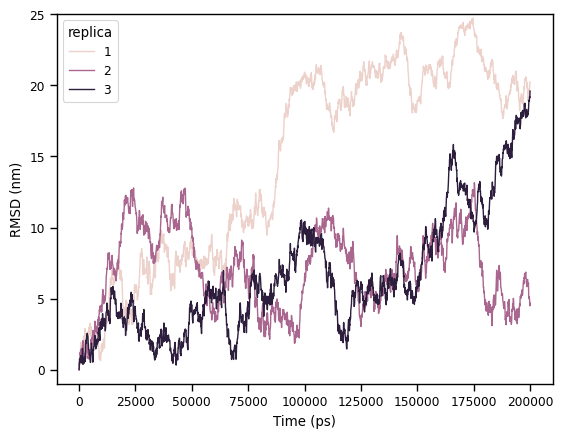

In [27]:
sns.lineplot(data = rmsd_DNA, x = "Time (ps)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-1,25)
plt.show()

In [28]:
names=['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29'\
          ,'B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29', 
           'Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict = dict(zip(names, np.arange(0,len(names)+1,1)))
names_A = ['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29']
names_B = ['B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29']
names_hinge= ['Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict

def plot_cmap(residue_list, file = folder):
    """Plotting of all distances between contacts in the cmap CV.
    
    """
    
    df_distances = pd.read_csv(file + "distances", sep='\s+', skiprows=0)

    names = residue_list
    list_dist = []
    
    # find out what residues you are analysing add the data to your df for plotting
    
    start, end = residue_dict[residue_list[0]],residue_dict[residue_list[-1]]
    
    for (i,j) in zip( range(start,end+1,1), names):
        df = pd.DataFrame({ 'Time (ps)':  list(df_distances.iloc[:,0]), 'Protein Residues' : \
                           [j for x in range(len((df_distances.iloc[:,0])))],\
                           "Distance (nm)" : list(df_distances.iloc[:,i+1])})
        list_dist.append(df)
    
    df_all = pd.concat([df for df in list_dist])
    return(df_all)

def plot_cdist(names, replica):
    "plot the distances from different replicas"
    
    cmap = plot_cmap(names, folder+"{}/".format(replica))
    sns.lineplot(data = cmap, x = "Time (ps)", y = "Distance (nm)", hue = "Protein Residues")
    plt.show()
    
def plot_hist_cdist(names, replica):
    "Plot a histogram for the data from several replicas"
    
    cmap = []
    for i in np.arange(1,replica+1,1):
    
        cmap_N = plot_cmap(names, folder+"{}/".format(i))
        cmap_N["replica"] = [i for x in range(len(cmap_N))]
        cmap.append(cmap_N)
    cmap = pd.concat([df for df in cmap])
    sns.histplot(data = cmap, x = "Distance (nm)", hue = "Protein Residues", element="poly")
    plt.xlim(0.2,2.5)
    plt.show()

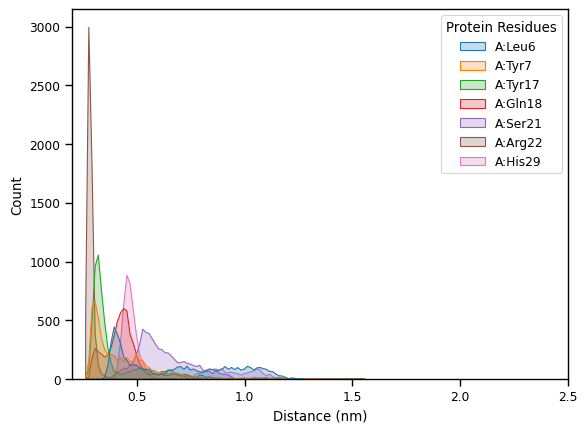

In [29]:
plot_hist_cdist(names_A,3)


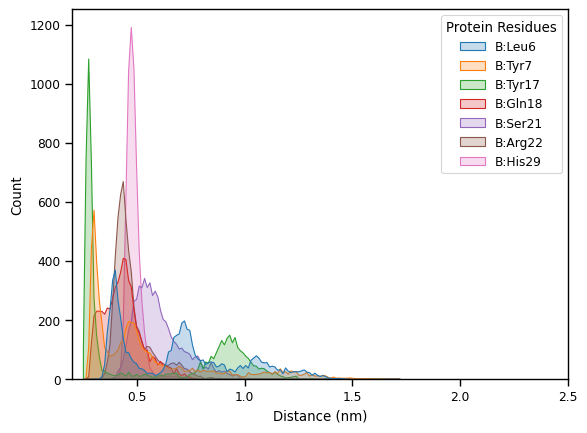

In [30]:
plot_hist_cdist(names_B,3)

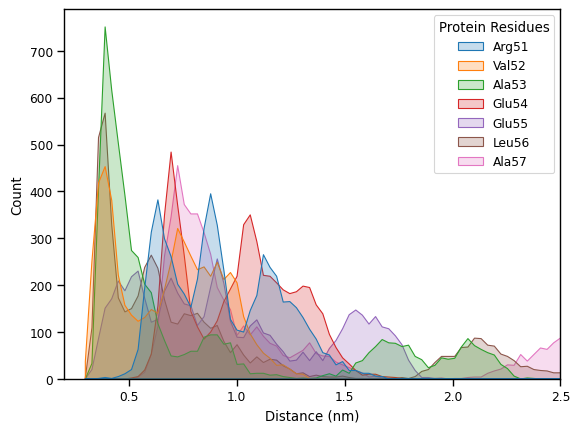

In [31]:
plot_hist_cdist(names_hinge,3)